In [1]:
import numpy as np

import sklearn as skl

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import pairwise_distances

In [2]:
### Generating Data

## GP kernel

def gp_kernel(t, sigma):
  return np.exp( - (1/(2*sigma**2))*t**2)

N_mesh = 100
x = np.linspace(0,1, N_mesh) # fine grid for visualization

## compute pairwise distance matrix

dist_matrix = pairwise_distances( x.reshape(-1,1), x.reshape(-1,1))

## GP lenghscal
sigma = 0.1
Cov_matrix = gp_kernel(dist_matrix, sigma) + 1e-8*np.eye(N_mesh)
Cov_matrix = 1/2*(Cov_matrix + Cov_matrix.T)

Cov_matrix_sqrt = np.linalg.cholesky(Cov_matrix)

In [3]:
## Training and test functions

N_train = 10
N_test  = 5
u_train = np.zeros((N_mesh, N_train))
u_test  = np.zeros((N_mesh, N_test))

for i in range(N_train):
  xi = np.random.randn(N_mesh)
  u_train[:, i] = np.dot(Cov_matrix_sqrt, xi)

for i in range(N_test):
  xi = np.random.randn(N_mesh)
  u_test [:, i] = np.dot(Cov_matrix_sqrt, xi)

# define pointwise operator

def operator(u):
  return u**2

v_train = operator(u_train)
v_test  = operator (u_test)

[Text(0.5, 0, 'x'), Text(0, 0.5, 'v_i(x)')]

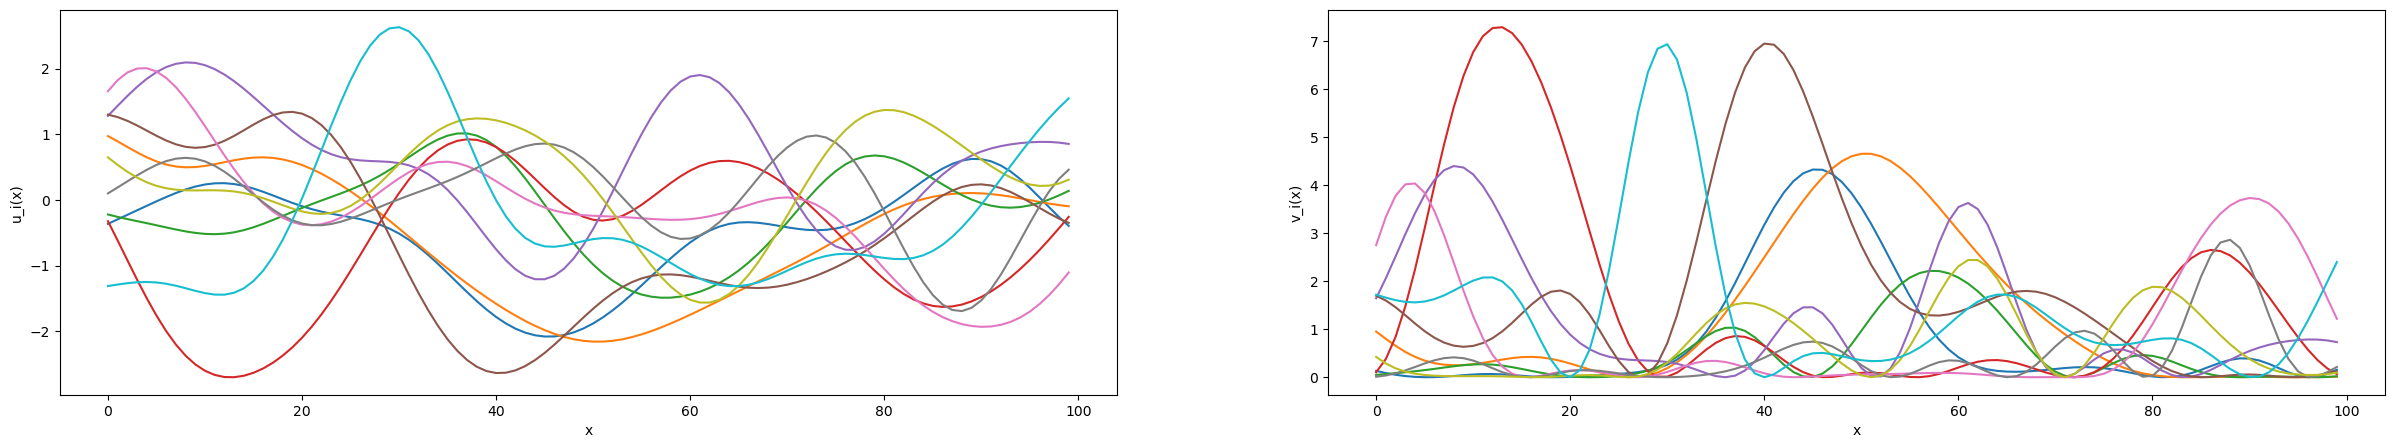

In [4]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(30,5)

ax[0].plot(u_train)
ax[0].set( xlabel ='x', ylabel='u_i(x)' )

ax[1].plot(v_train)
ax[1].set( xlabel ='x', ylabel='v_i(x)' )